In [26]:
import json
from typing import Union, List
import matplotlib.pyplot as plt
import numpy as np

In [23]:

def extract_key_information(file_path: str, keywords: Union[str, list[str]]) -> Union[list[str], dict]:
    if isinstance(keywords, str):
        keyword_out = []

        with open(file_path, "r", encoding="utf-8") as file:
            for line in file:
                data = json.loads(line)
                keyword_out.append(data.get(keywords))

        return keyword_out

    elif isinstance(keywords, list):
        keyword_out = {key: [] for key in keywords}

        with open(file_path, "r", encoding="utf-8") as file:
            for line in file:
                data = json.loads(line)
                for key in keywords:
                    value = data.get(key, "")
                    keyword_out[key].append(value)

        return keyword_out


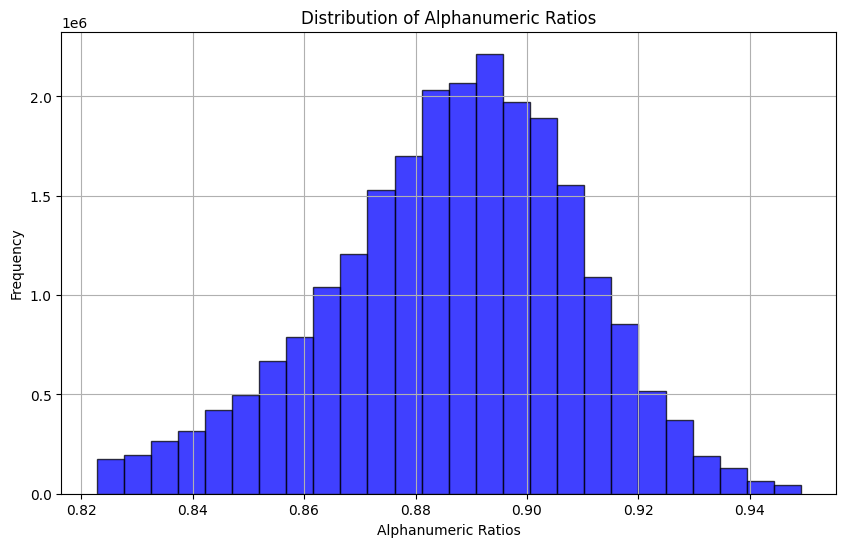

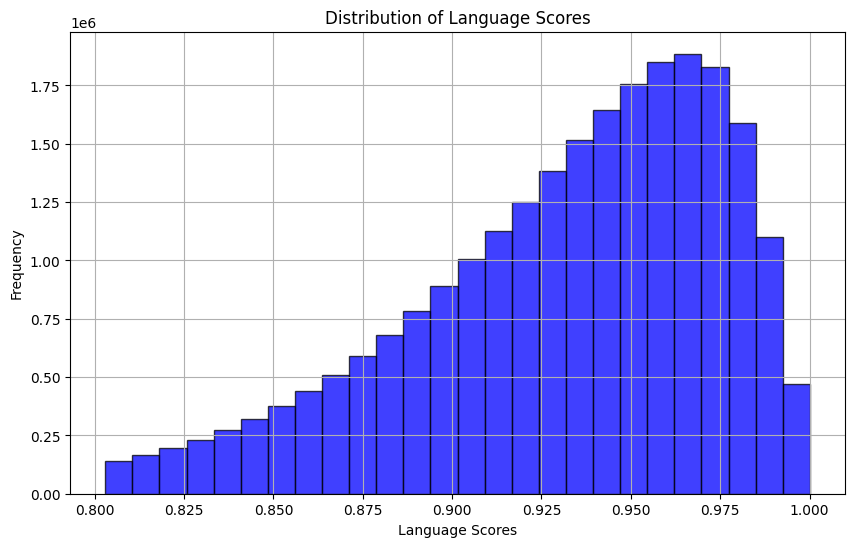

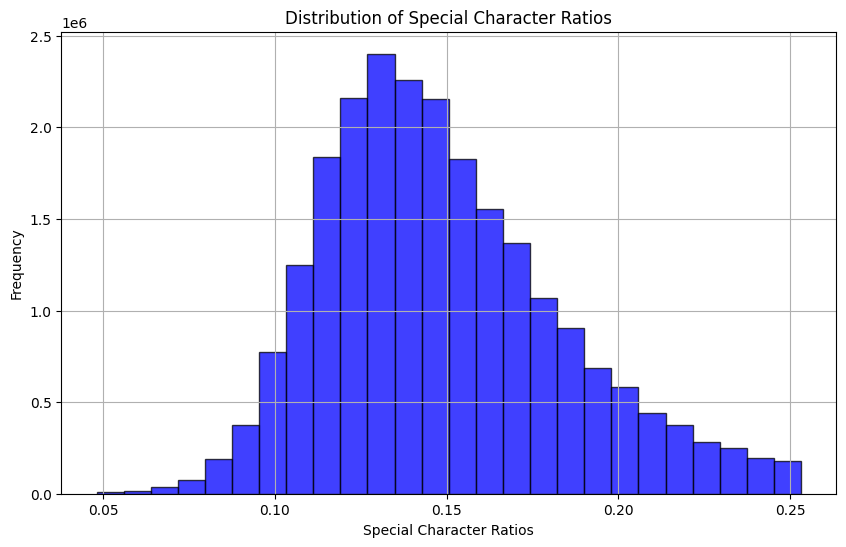

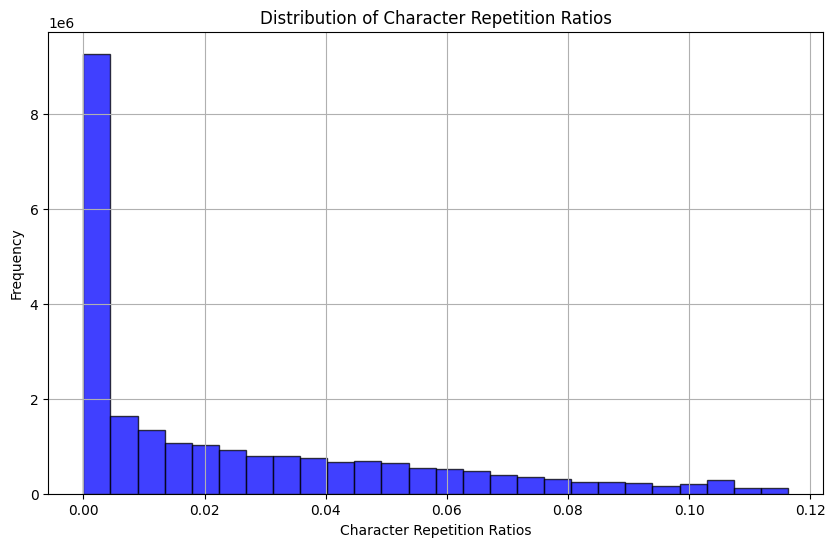

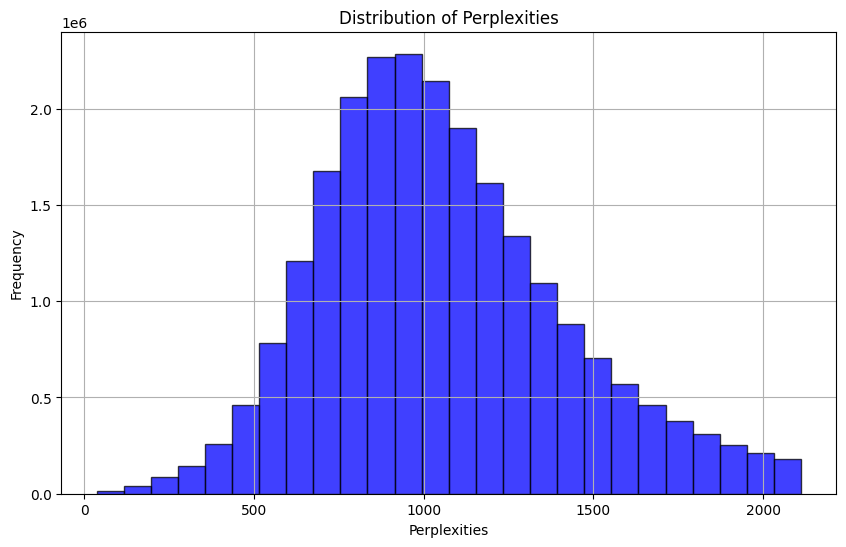

In [25]:
def remove_outliers(data: list[float]) -> list[float]:
    # 计算四分位数
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # 定义异常值范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 去除异常值
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]
    return filtered_data

def plot_distribution(data: list[float], title: str, bins: int = None) -> None:
    # 去除异常值
    data = remove_outliers(data)
    
    # 使用Sturges公式计算合适的分箱数量（如果未指定分箱数量）
    if bins is None:
        bins = int(np.ceil(np.log2(len(data)) + 1))
    
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f'Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


def analysis_base(source_file_path: str) -> None:
    

    keys = ["alnum_ratio","lang_score", "special_char_ratio",
            "char_rep_ratio", "perplexity"]
    dict_temp = extract_key_information(source_file_path, keys)

    alnum_ratios = dict_temp["alnum_ratio"]
    lang_scores = dict_temp["lang_score"]
    special_char_ratios = dict_temp["special_char_ratio"]
    char_rep_ratios = dict_temp["char_rep_ratio"]
    perplexities = dict_temp["perplexity"]

    #可视化各个指标的分布
    plot_distribution(alnum_ratios, "Alphanumeric Ratios")
    plot_distribution(lang_scores, "Language Scores")
    plot_distribution(special_char_ratios, "Special Character Ratios")
    plot_distribution(char_rep_ratios, "Character Repetition Ratios")
    plot_distribution(perplexities, "Perplexities")


if __name__ == '__main__':
    source_file_path = r'/data/nfs/data/Industry_raw_data/politics.jsonl'
    analysis_base(source_file_path)


In [5]:
import os
root_dir = r"/data/nfs/data/MNBVC/wiki_filter"
for folder_name in os.listdir(root_dir):
    print(folder_name)
    folder_path = os.path.join(root_dir, folder_name)
    print(folder_path)



20230197.jsonl
/data/nfs/data/MNBVC/wiki_filter/20230197.jsonl
20230198.jsonl
/data/nfs/data/MNBVC/wiki_filter/20230198.jsonl
